In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

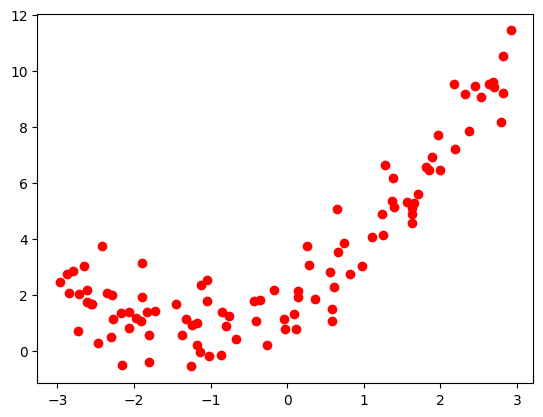

In [2]:
np.random.seed(42)
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2+np.random.randn(100,1)
plt.scatter(x,y,color='r')

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [5]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [6]:
regression.fit(x_train,y_train)
y_hat=regression.predict(x_test)

In [7]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_hat)
print("R square:",score)

R square: 0.6870833008069619


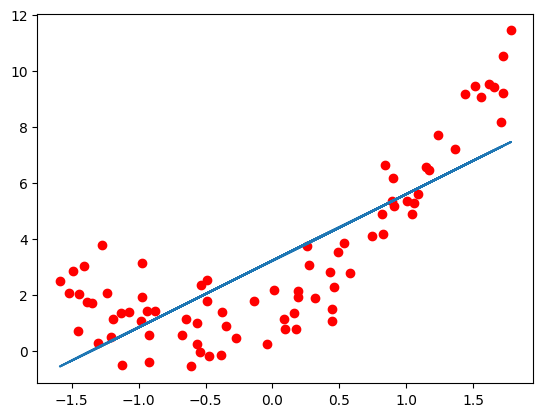

In [8]:
plt.scatter(x_train,y_train,color='r')
plt.plot(x_train,regression.predict(x_train))

we can see that out best fit line is not suitable for the non linear relationshib between the features

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [11]:
x_train_poly

array([[ 1.00000000e+00,  1.55811593e+00,  2.42772527e+00],
       [ 1.00000000e+00,  1.43909981e+00,  2.07100825e+00],
       [ 1.00000000e+00, -9.21682124e-01,  8.49497937e-01],
       [ 1.00000000e+00, -1.48921717e+00,  2.21776779e+00],
       [ 1.00000000e+00,  1.78134810e+00,  3.17320105e+00],
       [ 1.00000000e+00, -9.77545436e-01,  9.55595080e-01],
       [ 1.00000000e+00, -1.18825698e+00,  1.41195464e+00],
       [ 1.00000000e+00,  1.87596048e-01,  3.51922773e-02],
       [ 1.00000000e+00,  8.23991590e-01,  6.78962140e-01],
       [ 1.00000000e+00, -1.58833488e+00,  2.52280769e+00],
       [ 1.00000000e+00,  1.72305439e+00,  2.96891644e+00],
       [ 1.00000000e+00,  1.78445976e-01,  3.18429664e-02],
       [ 1.00000000e+00, -4.90723777e-01,  2.40809825e-01],
       [ 1.00000000e+00,  4.26860149e-01,  1.82209587e-01],
       [ 1.00000000e+00,  3.19944690e-01,  1.02364605e-01],
       [ 1.00000000e+00, -1.07166230e+00,  1.14846008e+00],
       [ 1.00000000e+00, -1.12340872e+00

In [12]:
regression.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print("Coefficients :",regression.coef_)
print("Bias :",regression.intercept_)

Coefficients : [[0.         2.14177725 1.73208521]]
Bias : [1.48086709]


predicted realtion : " y = 0.56726223 * x^2 + 1.44285051 * x + 1.73625819"
<br>orignal tranformation used :" y = 0.5 * x**2 + 1.5 * x + 2 + np.random.randn(100,1)"

In [14]:
y_pred=regression.predict(x_test_poly)

In [15]:
r2=r2_score(y_test,y_pred)
print('R2 :',r2)

R2 : 0.921489426719465


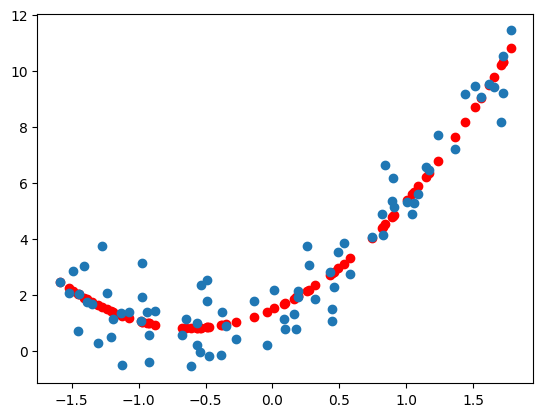

In [16]:
plt.scatter(x_train,regression.predict(x_train_poly),color='r')
plt.scatter(x_train,y_train)

In [17]:
# 3 prdiction of new data set
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=regression.predict(x_new_poly)

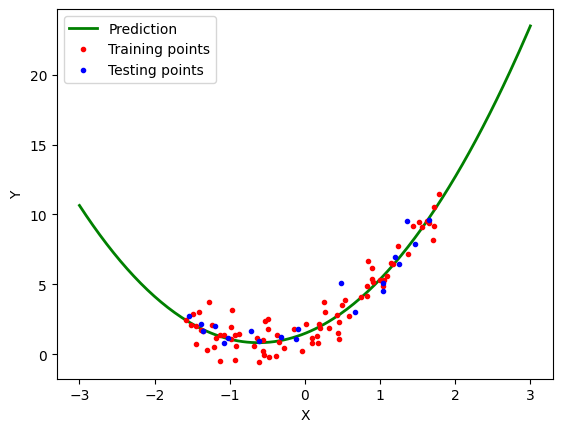

In [18]:
plt.plot(x_new,y_new,'g-',linewidth=2,label='Prediction')
plt.plot(x_train,y_train,'r.',label='Training points')
plt.plot(x_test,y_test,'b.',label='Testing points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Pipelineing concepts

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(x_new)
    
 
    
    #plotting prediction line
    plt.plot(x_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

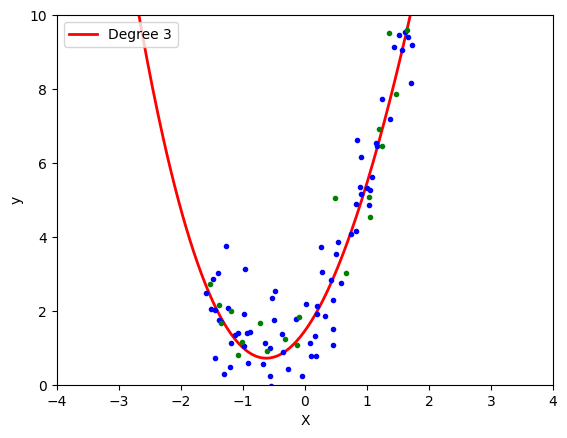

In [21]:
poly_regression(3)